<a href="https://colab.research.google.com/github/gourish2/hand-gesture-recognition/blob/main/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np

import matplotlib.pyplot as plt

import utils

import os

%matplotlib inline

from keras.preprocessing.image import ImageDataGenerator

from keras.layers import Dense, Input, Dropout,Flatten, Conv2D

from keras.layers import BatchNormalization, Activation, MaxPooling2D

from keras.models import Model, Sequential

from keras.optimizers import Adam

from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

from keras.utils import plot_model

from IPython.display import SVG, Image

import tensorflow as tf

print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.3.0


In [4]:
for expression in os.listdir("/content/drive/MyDrive/train"):
  print(str(len(os.listdir("/content/drive/MyDrive/train/"+expression)))+" "+expression+' images')

200 five images
200 four images
200 three images
200 one images
200 two images
200 zero images


In [5]:
img_size=64

batch_size=64

datagen_train=ImageDataGenerator(horizontal_flip=True)

train_generator=datagen_train.flow_from_directory("/content/drive/MyDrive/train",

                                                 target_size=(img_size,img_size),

                                                 color_mode='grayscale',

                                                 batch_size=batch_size,

                                                 class_mode='categorical',

                                                 shuffle=True)

datagen_validation=ImageDataGenerator(horizontal_flip=True)

validation_generator=datagen_train.flow_from_directory("/content/drive/MyDrive/train",

                                                 target_size=(img_size,img_size),

                                                 color_mode='grayscale',

                                                 batch_size=batch_size,

                                                 class_mode='categorical',

                                                 shuffle=True)

Found 1200 images belonging to 6 classes.
Found 1200 images belonging to 6 classes.


In [6]:
model=Sequential()

#conv-1

model.add(Conv2D(64,(3,3),padding='same',input_shape=(64,64,1)))

model.add(BatchNormalization())

model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

#2 -conv layer

model.add(Conv2D(128,(5,5),padding='same'))

model.add(BatchNormalization())

model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

#3 -conv layer

model.add(Conv2D(512,(3,3),padding='same'))

model.add(BatchNormalization())

model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

#4 -conv layer

model.add(Conv2D(512,(3,3),padding='same'))

model.add(BatchNormalization())

model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))

model.add(BatchNormalization())

model.add(Activation('relu'))

model.add(Dropout(0.25))

model.add(Dense(512))

model.add(BatchNormalization())

model.add(Activation('relu'))

model.add(Dropout(0.25))

model.add(Dense(6,activation='softmax'))

opt=Adam(lr=0.0005)

#lr-learning rate

model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 128)       5

In [7]:
ephocs=15

steps_per_epoch=train_generator.n//train_generator.batch_size

steps_per_epoch

validation_steps=validation_generator.n//validation_generator.batch_size

validation_steps

history=model.fit(

    x=train_generator,

    steps_per_epoch=steps_per_epoch,

    epochs=ephocs,

    validation_data=validation_generator,

    validation_steps=validation_steps,

 #   callbacks=callbacks

)

model.save('hand_gesture.h5')

Epoch 1/15
18/18 [==============================] - 393s 22s/step - loss: 1.0101 - accuracy: 0.6100 - val_loss: 153.0934 - val_accuracy: 0.1649
Epoch 2/15
18/18 [==============================] - 105s 6s/step - loss: 0.3318 - accuracy: 0.8935 - val_loss: 127.4513 - val_accuracy: 0.1649
Epoch 3/15
18/18 [==============================] - 102s 6s/step - loss: 0.1645 - accuracy: 0.9542 - val_loss: 84.8090 - val_accuracy: 0.1658
Epoch 4/15
18/18 [==============================] - 102s 6s/step - loss: 0.0933 - accuracy: 0.9798 - val_loss: 48.5075 - val_accuracy: 0.1701
Epoch 5/15
18/18 [==============================] - 104s 6s/step - loss: 0.0764 - accuracy: 0.9806 - val_loss: 31.0787 - val_accuracy: 0.1658
Epoch 6/15
18/18 [==============================] - 102s 6s/step - loss: 0.0513 - accuracy: 0.9886 - val_loss: 20.5443 - val_accuracy: 0.1615
Epoch 7/15
18/18 [==============================] - 102s 6s/step - loss: 0.0505 - accuracy: 0.9903 - val_loss: 9.6856 - val_accuracy: 0.2153
Epoc

one


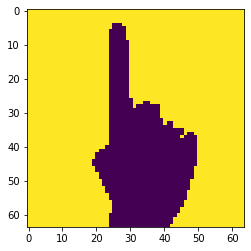

In [11]:
import numpy as np

from keras.preprocessing import image

test_image = image.load_img('/content/drive/MyDrive/train/one/one101.png', target_size = (64,64),color_mode = "grayscale")

plt.imshow(test_image)

test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis = 0)

result = model.predict(test_image)

a=result.argmax()

s=train_generator.class_indices

        #print(s)

name=[]

for i in s:

    name.append(i)

for i in range(len(s)):

    if(i==a):

        q=name[i]

print(q)

In [13]:
from tensorflow.keras.models import load_model

loaded_model=load_model('/content/hand_gesture.h5')

In [17]:
from tensorflow.keras.preprocessing import image

import numpy as np

import cv2

#we are starting our web cam

webcam=cv2.VideoCapture(0)

cap = cv2.VideoCapture(0)

# Category dictionary

categories = {0: 'ZERO', 1: 'ONE', 2: 'TWO', 3: 'THREE', 4: 'FOUR', 5: 'FIVE'}

s=""

d={}

p=""

count=0

while True:
  _, frame = cap.read()
  # Simulating mirror image
  frame = cv2.flip(frame, 1)
  # Got this from collect-data.py
  # Coordinates of the ROIimport sys

  x1 = int(0.5*frame.shape[1])
  y1 = 10
  x2 = frame.shape[1]-10
  y2 = int(0.5*frame.shape[1])
  # Drawing the ROI
  # The increment/decrement by 1 is to compensate for the bounding box
  cv2.rectangle(frame, (x1-1, y1-1), (x2+1, y2+1), (255,0,0) ,1)
  # Extracting the ROI
  roi = frame[y1:y2, x1:x2]
  # Resizing the ROI so it can be fed to the model for prediction
  roi = cv2.resize(roi, (64, 64)) 
  roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
  _, test_image = cv2.threshold(roi, 120, 255, cv2.THRESH_BINARY)
  cv2.imshow("test", test_image)
  # Batch of 1
  result = loaded_model.predict(test_image.reshape(1, 64, 64, 1))
  prediction = {'FIVE': result[0][0], 
                'FOUR': result[0][1], 
                'ONE': result[0][2],
                'THREE': result[0][3],
                'TWO': result[0][4],
                'ZERO': result[0][5]}
  max_key = max(prediction, key=prediction.get)
  cv2.putText(test_image,max_key,(x1,y1),cv2.FONT_HERSHEY_SIMPLEX,1,(255, 0, 0),2) 
  print(max_key)
  cv2.imshow("Frame", frame)
  interrupt = cv2.waitKey(2)
  if interrupt & 0xFF == 27: 
    # esc key
    break

cap.release()

cv2.destroyAllWindows()

AttributeError: ignored